### Chefkoch link data - exploratory analysis

This is a first attempt to look at some of the data resulting from the chefkoch link data (without getting fancy about graph databases). 

The first major result is that data quality is poor - suggesting I need to revisit the regexes.

In [76]:
# Import libraries and define graphics preferences
import pandas as pd
import re
import matplotlib.pyplot as plt
from ggplot import *
%matplotlib inline

In [77]:
# Read data
df = pd.read_csv("/Users/Leon/Documents/02_Research_Learning/Research/Recipes/03_Data/link_data.csv",
                index_col=0)

In [78]:
# Fix data formats
df['activationdate'] = pd.to_datetime(df['activationdate']) # Well that was easy!
df['difficulty'] = df['difficulty'].astype('category')

# Fix data format for preparation time
df['preptime'] = df['preptime'].astype('string')
df['prep_mins'] = df['preptime'].apply(lambda x: x.replace(" min.", "")).astype('float64')

# Fix data format for strings
df['subtitle'] = df['subtitle'].astype('str') # These aren't working (for obscure reasons)
df['title'] = df['title'].astype('str')
# df.dtypes

# Define additional variable for yearmonth (for plotting)
df['yearmonth'] = df['activationdate'].map(lambda x: x.year*1000 + x.month)
df['year'] = df['activationdate'].map(lambda x: x.year)

In [79]:
df.shape

(29978, 13)

In [80]:
df.columns

Index([u'activationdate', u'category', u'category_list_page', u'difficulty',
       u'preptime', u'subtitle', u'title', u'url', u'votes_avg', u'votes_n',
       u'prep_mins', u'yearmonth', u'year'],
      dtype='object')

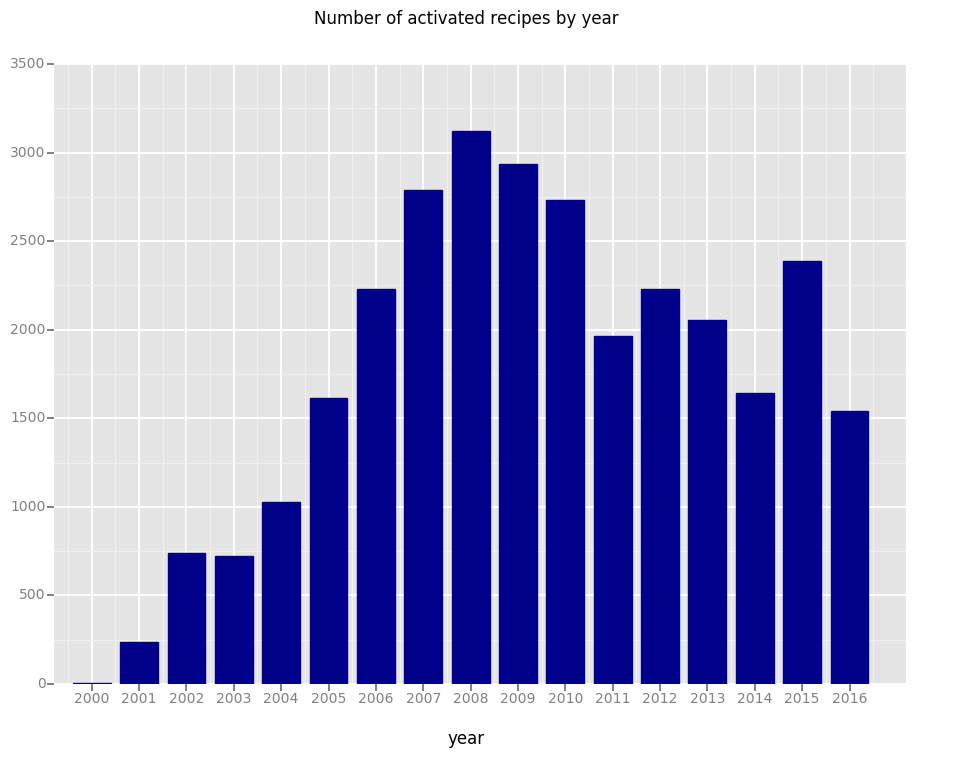

<ggplot: (316079945)>

In [109]:
ggplot(df, aes(x='year')) + geom_bar(fill='darkblue') + ggtitle('Number of activated recipes by year')

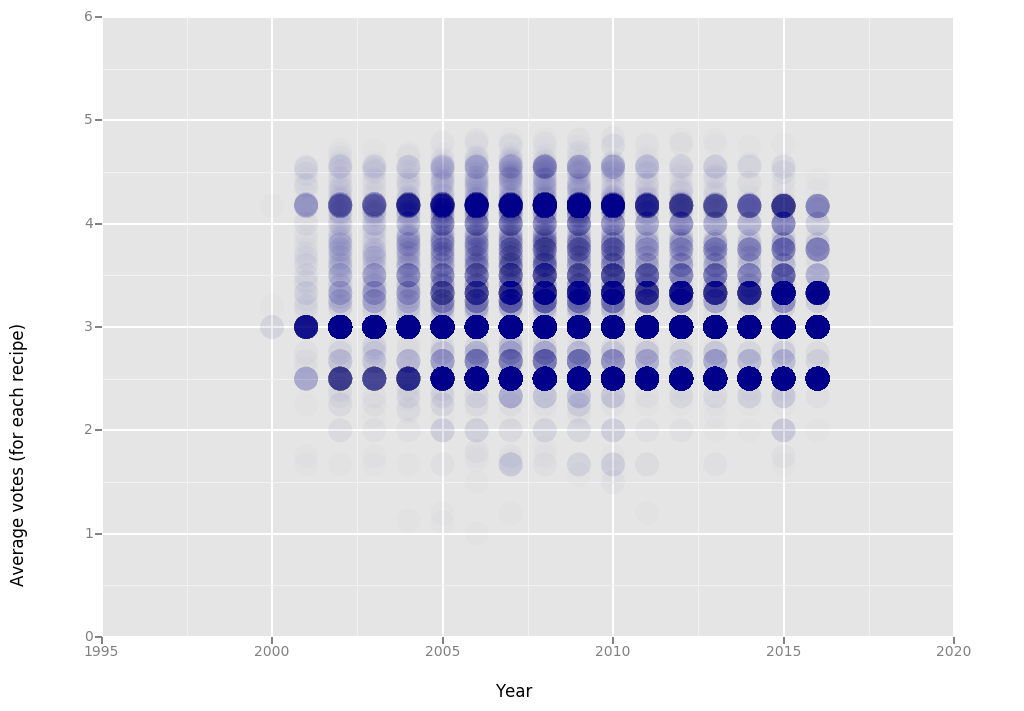

<ggplot: (320769765)>

In [120]:
ggplot(df, aes(x = 'year', y = 'votes_avg')) + geom_point(color="darkblue", alpha=0.01, size=300) + xlab('Year') + ylab('Average votes (for each recipe)')

The scatterplot is interesting but slightly misleading: There is a huge bunch around 3, as seen by the histogram in the next cell.

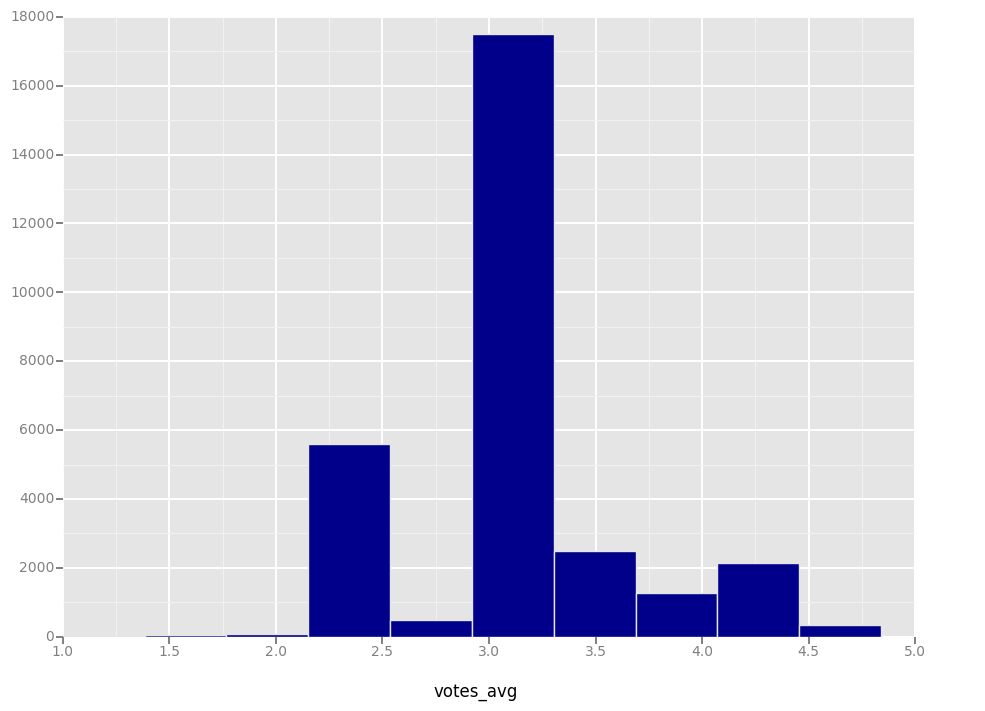

<ggplot: (315951701)>

In [113]:
ggplot(df,aes(x='votes_avg')) + geom_histogram(fill='darkblue')

In [75]:
# df.groupby(df['difficulty','year']).count()
df.loc[:,['votes_n','difficulty','year']].groupby(['difficulty','year']).count().unstack()

votes_n                                                       \
year          2001  2002  2003  2004   2005   2006   2007   2008   2009   
difficulty                                                                
normal         1.0   7.0   2.0   5.0    8.0    5.0   23.0   19.0   22.0   
pfiffig        NaN   NaN   NaN   1.0    NaN    1.0    NaN    1.0    1.0   
simpel        14.0  55.0  35.0  58.0  109.0  113.0  192.0  169.0  167.0   

                                                             
year         2010   2011   2012   2013   2014   2015   2016  
difficulty                                                   
normal       22.0   14.0   19.0    7.0   11.0   93.0   52.0  
pfiffig       3.0    1.0    1.0    NaN    1.0    1.0    1.0  
simpel      183.0  126.0  217.0  255.0  229.0  434.0  322.0